# Learning from Data: Workshop 4 

 | Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|6th February 2015  | **12:00 Monday 23rd February 2015** |




Note that both paper (BART) and electronic submissions are required.


Candidate number: ** 033456 **  

In [664]:
% pylab inline
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Robust linear regression

Standard regression analysis minimises the  squared
error between the regression line and the data, namely:
\begin{equation*}
    E_2(\mathbf{w}) = \sum_{n=1}^N (t_n - y_n(\mathbf{x}; \mathbf{w}) )^2
  \end{equation*}
  where $y_n(\mathbf{w}) = w_0 + w_1 x_n$ and $\mathbf{w} = (w_0, w_1)$. Recall that the
  sum of squares error function $E_2$ comes from the negative log
  likelihood and the assumption that the errors are normally (Gaussian) distributed.

A heavy-tailed distribution that is more appropriate if there are
  occasional large deviations from the systematic trend is the Laplacian
  distribution:
  \begin{align*}
    p(\epsilon_n) = p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \propto \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
  \end{align*}
  Substitute this expression for $ p(t_n \,|\, \mathbf{x}_n, \mathbf{w})$ into the
  general expression for an error function $E(\mathbf{w}) = -\sum_{n=1}^N \log
  p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) $ to show that the error function that arises
  from this noise distribution is
  \begin{equation*}
    E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
  \end{equation*}

<center><h3>Answer</h3></center><br>

\begin{equation*}
E_1(\mathbf{w}) =
-\sum_{n=1}^N \log p(t_n \,|\, \mathbf{x}_n, \mathbf{w})
= \\
    -\sum_{n=1}^N \ln
    \left(
    \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
    \right)
= \\
    -\sum_{n=1}^N
    \left(
    - \frac{| \epsilon_n | }{\sigma}
    \right)
= \\
    \frac{1}{\sigma}
    \sum_{n=1}^N
    | \epsilon_n |
= \\
    \frac{1}{\sigma}
    \sum_{n=1}^N
    |t_n - y_n|
\end{equation*}

<br>
<center>I guess we can get rid of the $\frac{1}{\sigma}$ givent that it's costant:</center>
\begin{equation*}
E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
\end{equation*}

The file <code>outlier.txt</code> contains the same data as the one-dimensional linear regression data that you used last workshop.  You can download it and split it into features and targets with the following.

In [665]:
try: 
    X = loadtxt('outlier.txt')
except IOError:
    !wget --no-verbose http://empslocal.ex.ac.uk/~reverson/ECM3420/outlier.txt
    X = loadtxt('outlier.txt')
print X.shape
x = X[:,0]
t = X[:,1]

(20, 2)


Plot $t_n$ versus $x_n$ and find the
  linear regression line for these data using $E_2$. Notice how the
  regression line is grossly affected by the single outlier.


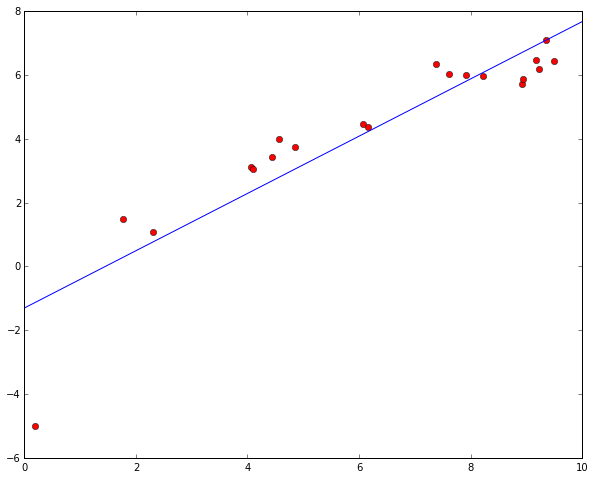

In [666]:
x = np.matrix(x) # make x a matrix
ones = np.matrix(np.ones(x.size))
# combine matrix of ones with matrix x into one:
x_m = np.hstack([ones.T, x.T])
# compute w using presudo-inverse method
w = np.dot(np.linalg.pinv(x_m), t)
# extract wo & w1
w0 = np.array(w)[0][0]
w1 = np.array(w)[0][1]
x = np.array(x)[0] # make x an array type again

# function to generate y from x according to the y = w0 + w1*x
def data_func(w0, w1, x):
    return w0 + w1*x

plot(x, t, 'ro', label='Normal')

# generate some x's
_cx = linspace(0, 10, 10)
plot(_cx, data_func(w0, w1, _cx), 'b-', label='Normal')

Write a
  routine to fit a find a straight fitting the data by minimising
  $E_1(\mathbf{w})$.  Note that the pseudo-inverse will not work here.  One
  possibility is to find the minimum error by trying a grid of combinations
  of $w_0$ and $w_1$.  From your plot of the data you should be able to
  estimate appropriate ranges of $w_0$ (the intercept) and $w_1$ (the
  gradient) to search.   If you adopt this approach it is nice to plot a
  contour or <code>pcolor</code> representation of $E_1(\mathbf{w})$ as a function of
  $w_0$ and $w_1$.

   Plot and compare your fitted line with the line derived from the
  squared error (all on the same graph).

  Searching a grid like this works well when there are just two
  coefficients to be found, but is computationally very expensive when
  there are many. An alternative is to use a numerical minimiser such as
  <code>scipy.optimize.fmin</code> to locate the minimum -- you might start the search
  at the solution to the $E_2$ problem.  For example, the following cell will minimise the bannana function of two variables from the starting point <code>x0</code>.

In [667]:
import scipy.optimize

def banana(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

xopt = scipy.optimize.fmin(func=banana, x0=[-1.2,1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 159


E1 minimised manually: 11.6083408163, w0: 0.285714285714, w1: 0.689795918367

E1 minimised using scipy.optimize.fmin:
Optimization terminated successfully.
         Current function value: 11.598150
         Iterations: 43
         Function evaluations: 81
w0: 0.278274310561, w1: 0.690374867163


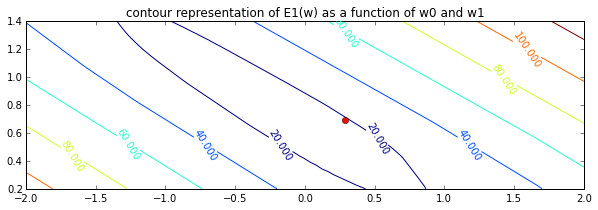

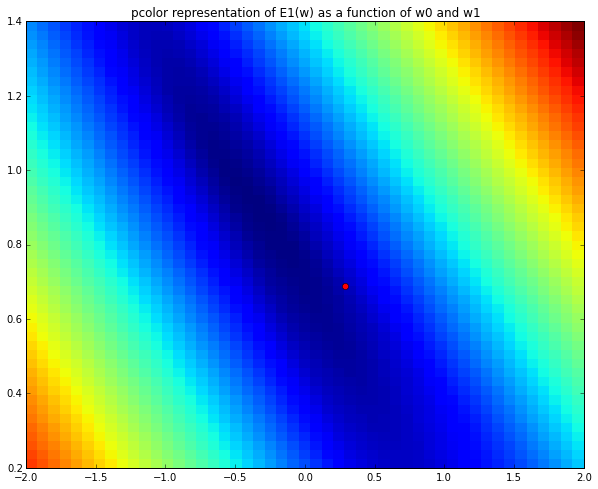

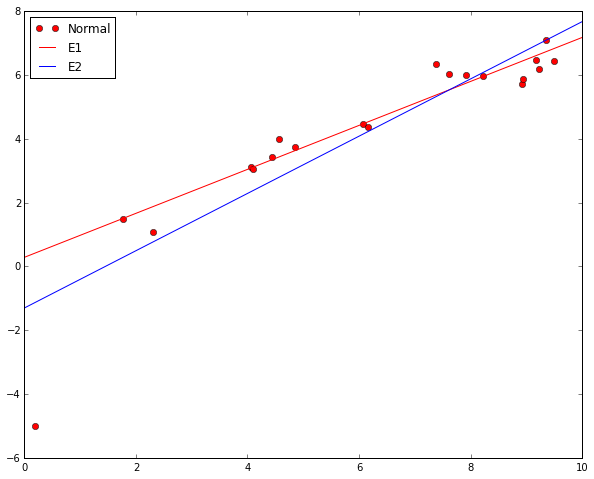

In [668]:
# construct matricies or range of vals for w0, w1?
# generate samples)
cw0 = linspace(-2, 2, 50)
cw1 = linspace(0.2, 1.4, 50)

# compute error1 value given t and y
def e1(t, y):
    return sum(abs(t - y))

def minimise_e1(cw0, cw1, x, t):
    min_e1 = e1(t, data_func(cw0[0], cw1[0], x))
    w0_min = cw0[0]
    w1_min = cw1[0]
    # matrix to store error value for each w0 & w1 combo (for plotting)
    error_matrix = np.zeros((cw0.size, cw1.size))
    # loop over all combinations of w0 & w1
    for i, w0 in enumerate(cw0):
        for j, w1 in enumerate(cw1):
            # compute error for this w0 & w1 combo
            e1_candidate = e1(t, data_func(w0, w1, x))
            error_matrix[i][j] = e1_candidate
            # remember w0 & w1 if e1_candidate is the smallest so far
            if e1_candidate < min_e1:
                min_e1 = e1_candidate
                w0_min = w0
                w1_min = w1
                
    # plot the graphs
    title("contour representation of E1(w) as a function of w0 and w1")
    cplot = contour(cw0, cw1, error_matrix)
    clabel(cplot, inline=1, fontsize=10)
    plot(w0_min, w1_min, 'ro', label='min E1')
    axis('scaled')
    figure()
    title("pcolor representation of E1(w) as a function of w0 and w1")
    pcolor(cw0, cw1, error_matrix)
    plot(w0_min, w1_min, 'ro', label='min E1')
    print "E1 minimised manually: %s, w0: %s, w1: %s" % (min_e1, w0_min, w1_min)
    
    return w0_min, w1_min

w0_e1, w1_e1 = minimise_e1(cw0, cw1, x, t)

# Plot and compare your fitted line with the line derived from the squared error (all on the same graph)
figure()
plot(x, t, 'ro', label='Normal')

# generate some x's
_cx = linspace(0, 10, 10)
plot(_cx, data_func(w0_e1, w1_e1, _cx), 'r-', label='E1')
plot(_cx, data_func(w0, w1, _cx), 'b-', label='E2')
legend(loc=2)



# Solve E1 minisation using `scipy.optimize.fmin`

def my_wrapper(x, t, x_arr):
    return e1(t, data_func(x[0], x[1], x_arr))
    
print "\nE1 minimised using scipy.optimize.fmin:"
xopt_2 = scipy.optimize.fmin(func=my_wrapper, x0=[-2, 0.3], args=(t, x))
print "w0: %s, w1: %s" % (xopt_2[0], xopt_2[1])

Note how the $E_1$ regression line passes close to the majority of the data because the outlier carries less weight than in the $E_2$ case.

> ### Answer
Indeed, $E_1$ is less biased to the outlier and seems to be a better fit for the data than $E_2$.

## Radial basis function regression

Here is the demonstration of radial basis functions that I showed in a lecture with a couple of modifications.

The first cell just defines a generator that produces colours in turn, which is useful for plotting later.

In [669]:
def colour():
    """Yield colours in turn"""
    colours = "bgrcmyk"
    i = 0
    while True:
        yield colours[i]
        i = (i + 1) % len(colours)

cgen = colour()

### Make some data

In [670]:
N = 20
xtr = rand(N)*3
xtr[:N//2] += 4           # add 4 to the first half of the data
xtr = sorted(xtr)         # Sorting helps visualise the design matrix later
ttr = sin(xtr) + randn(N)*0.2

xte = rand(N)*3
xte[:N//2] += 4
xte = sorted(xte)         # Sorting helps visualise the design matrix later
tte = sin(xte) + randn(N)*0.2

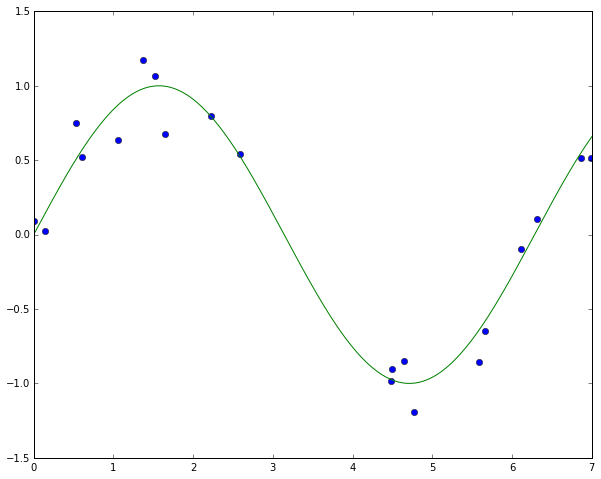

In [671]:
plot(xtr, ttr, 'bo')
xx = linspace(0, 7, 200)
plot(xx, sin(xx), 'g')

### Define radial basis functions

\begin{align*}
\phi(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-x^2/(2\sigma^2)\right\}
\end{align*}

In [672]:
def phi(x, c, sigma=0.1):
    """Radial basis function centred at c with "radius" sigma"""
    return exp(-(x-c)**2/(2*sigma**2))/(sqrt(2*pi)*sigma)

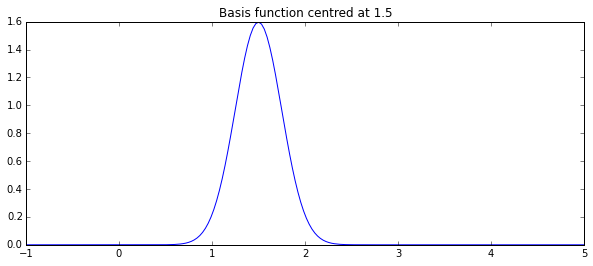

In [673]:
def plot_phi():
    x = linspace(-1, 5, 200)
    c = 1.5
    plot(x, phi(x, c, 0.25))
    title('Basis function centred at %g' % c)
    
figure(figsize=(10,4))
plot_phi()

### Choose centres and find the activations

In [674]:
# We could choose the centres randomly, but here we'll choose 
# every other one to get an even spread
M = 10
I = np.random.choice(N, M, replace=False)
I = sorted(I)           # Only useful for plotting

Plot the centres $x_m$ and the activations of each of the data points $\phi(x_n-x_m)$.  Note how the activations are large only for the points close to a particular centre.

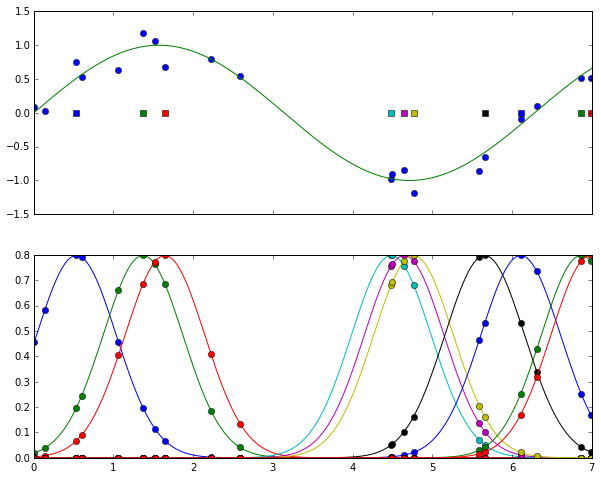

In [675]:
sigma = 0.5     # Choose the width of the basis functions

fig, ax = plt.subplots(2, 1, sharex=True)

# Plot first graph
ax[0].plot(xtr, ttr, 'bo')
ax[0].plot(xx, sin(xx), 'g')

# Plot 2nd graph
for i in I:
    colour = cgen.next()
    ax[1].hold(True)
    ax[1].plot(xx, phi(xx, xtr[i], sigma=sigma), c=colour)
    activation = phi(xtr, xtr[i], sigma=sigma)
    ax[1].plot(xtr, activation, ls='', c=colour, marker='o')
    ax[0].plot(xtr[i], 0.0, marker='s', c=colour)

### Construct a design matrix

\begin{align*}
    \newcommand{\bx}{\mathbf{x}}
    \newcommand{\bX}{\mathbf{X}}
    \newcommand{\bw}{\mathbf{w}}
      \bX =
      \begin{bmatrix}
        1 &\phi_1(\bx_1) & \phi_2(\bx_1) & \ldots & \phi_M(\bx_1)\\
        1& \phi_1(\bx_2) & \phi_2(\bx_2) & \ldots & \phi_M(\bx_2)\\
        1 & \phi_1(\bx_3) & \phi_2(\bx_3) & \ldots & \phi_M(\bx_3)\\
        \vdots & & & & \vdots\\
        1 & \phi_1(\bx_N) & \phi_2(\bx_N) & \ldots & \phi_M(\bx_N)\\
      \end{bmatrix}
    \end{align*}

<matplotlib.colorbar.Colorbar instance at 0x122dd1e18>

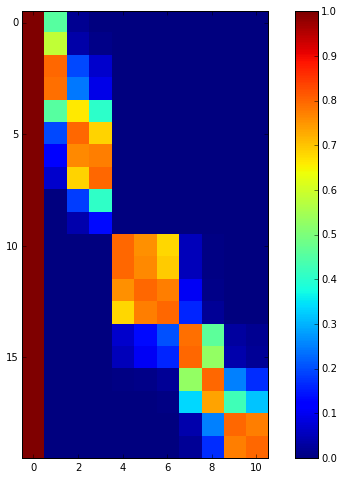

In [676]:
X = zeros((N,M+1))
X[:,0] = 1    # Bias

for m, i in enumerate(I):
    activation = phi(xtr, xtr[i], sigma=sigma)
    X[:,m+1] = activation

imshow(X, interpolation='nearest')
colorbar()

### Solve for the weights using the pseudo-inverse

In [677]:
w = dot(np.linalg.pinv(X), ttr)

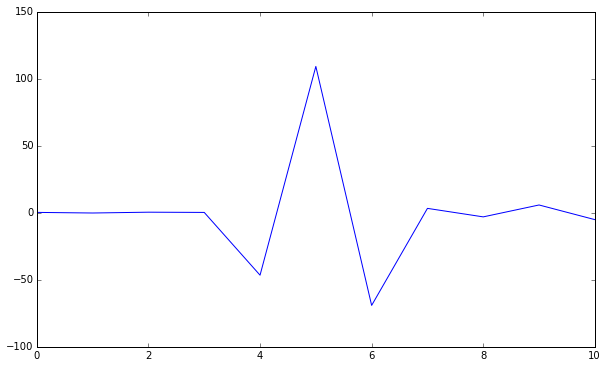

In [678]:
figure(figsize=(10,6))
plot(w)

### Predictions $y(x)$

\begin{align*}
    \newcommand{\bx}{\mathbf{x}}
    \newcommand{\bw}{\mathbf{w}}
      y(\bx; \bw) &= w_0 + \sum_{m=1}^M w_m \phi(\bx-\bx_m)\\
      &= w_0 + \sum_{m=1}^M w_m \phi_m(\bx)
    \end{align*}

In [679]:
# Make predictions at lots of points to get a smooth curve
Npred = 200
xtest = linspace(0, 7, Npred)

X = zeros((Npred,M+1))
X[:,0] = 1    # Bias
for m, i in enumerate(I):
    activation = phi(xtest, xtr[i], sigma=sigma)
    X[:,m+1] = activation

ytest = dot(X, w)

(-4, 4)

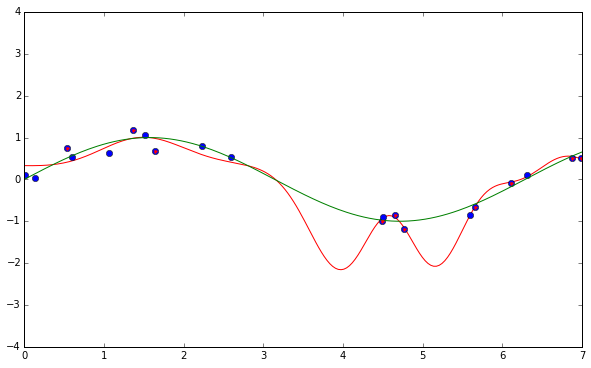

In [680]:
figure(figsize=(10,6))
plot(xtest, ytest, 'r')
plot(xtr, ttr, 'bo')
plot(xx, sin(xx), 'g')

for i in I:
    plot(xtr[i], ttr[i], 'r.')
ylim(ymin=-4, ymax=4)

### Exploring $\sigma$ and $M$

Using the above code as a model write a function

    rbf(xtr, ttr, xte, M, sigma)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code>, using <code>M</code> centres and a width <code>sigma</code> for the radial basis functions.   Your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

Use your function to explore the effect of changing $M$ and $\sigma$.  What happens when they are large and small?  Plot both the predictions and the weights.  Notice that $\sigma$ has a smoothing effect when it is large and that poor predictions are made when $\sigma$ is too small.  Also explore what happens when $M$ is large (it can't be larger than the number of training points).  Notice that in this situation the weights can become very large in magnitude and if $\sigma$ is not large enough to provide lots of smoothing then the predictions are very poor where there is not much data.


In [681]:
def construc_design_matrix(x, c, M, sigma, centers):
    N = len(x)

    X = zeros((N,M+1))
    X[:,0] = 1    # Bias

    for m, i in enumerate(centers):
        # compute activation for each center point
        activation = phi(x, c[i], sigma=sigma)
        X[:,m+1] = activation
    return X


def rbf(xtr, ttr, xte, M, sigma):
    xx = linspace(0, 7, 200)

    N = len(xtr)
    Npred = len(xte)
    assert M <= N
    
    # TRAIN
    # pick center points
    I = np.random.choice(N, M, replace=False)
    I = sorted(I)           # Only useful for plotting  
    
    X = construc_design_matrix(xtr, xtr, M, sigma, I)
    # solve for the weights using the pseudo-inverse
    w = dot(np.linalg.pinv(X), ttr)

    # PREDICT
    X = construc_design_matrix(xte, xtr, M, sigma, I)
    tte = dot(X, w)

    # Plot predictions
    figure(figsize=(10,6))
    plot(xte, tte, 'r-', label="test data")
    plot(xtr, ttr, 'bo', label="training data")
    plot(xx, sin(xx), 'g', label="original function")
    legend(loc=2)
    
    for i in I:
        plot(xtr[i], ttr[i], 'r.')
    
    figure()
    title("Computed Weights")
    plot(w)

    return tte, w

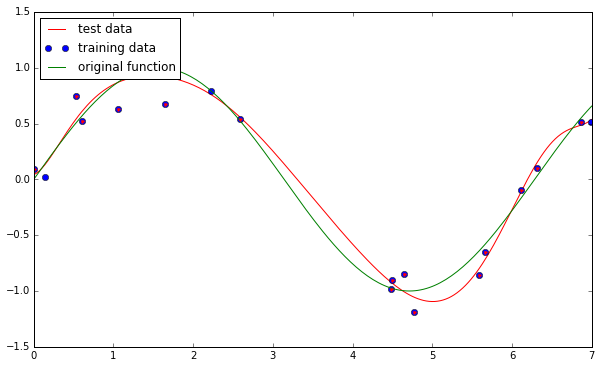

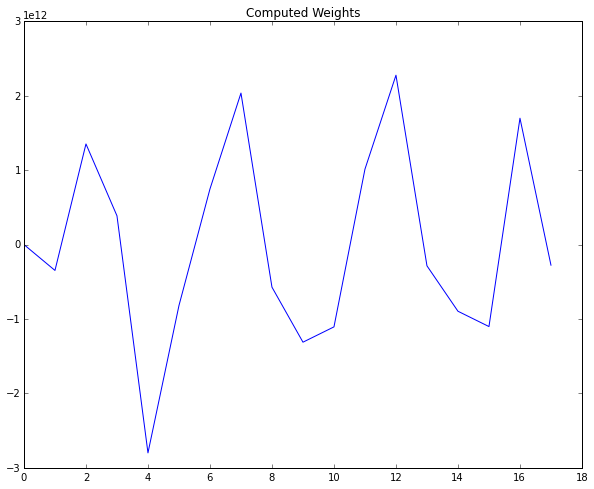

In [682]:
rbf(xtr, ttr, xtest, 17, 5)
print

Choosing a few centres uniformly at random, as we have done here, seems like a good idea because it should ensure that there are a basis functions covering every region of the feature space.  However, if we are unlucky the basis functions all end up close to each other, leaving other parts of the space without any coverage.  You may have noticed this happening as you experimented. Two alternatives to counter this are:

*  Cluster the data and place a basis function at the centre of each cluster.  Here we still have to choose the number of centres to use.

* Put a basis function on *every* point. This could be expensive with lots of data, but we won't need to worry about this.  However, the weights may become very large and the predictions very poor, particularly if $\sigma$ is small.

It would be nice to have a radial basis function regressor that didn't require us to choose $M$ and $\sigma$.  To achieve this we'll put a basis function on every training data point, removing the need to choose $M$.  A reasonable strategy for choosing $\sigma$ is to set it equal to a multiple of the average distance to neighbouring data points. 

Copy your <code>rbf</code> function to make a new function that chooses $M = N$ and $\sigma$ to be, say 10 times, the average distance to the nearest neighbours.  How well does this perform?

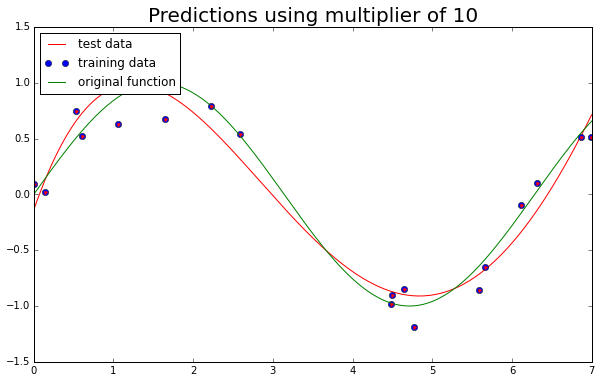

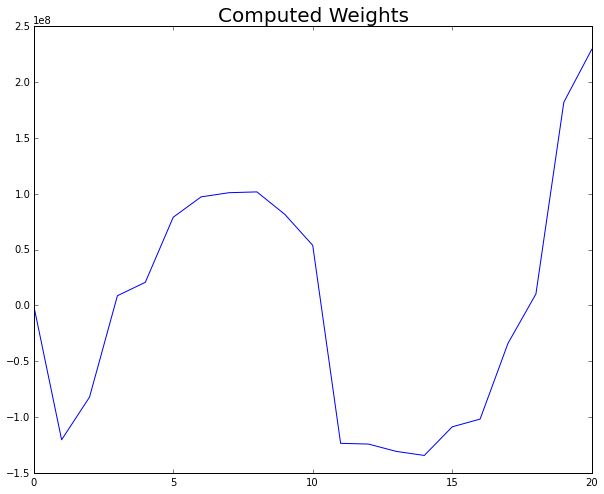

In [683]:
import scipy.stats
import scipy.spatial.distance

def rbf_2(xtr, ttr, xte, mult=10, do_not_plot=False):
    # compute sigma
    # combine xtr & ttr into (x,y) pairs matrix
    data = np.hstack([np.matrix(xtr).T, np.matrix(ttr).T])
    # compute distances between neighbours
    distances = scipy.spatial.distance.cdist(data, data)
    # compute average distance between points
    sigma = mult*mean(distances)
    
    xx = linspace(0, 7, 200)

    N = len(xtr)
    Npred = len(xte)
    
    # TRAIN
    X = construc_design_matrix(xtr, xtr, N, sigma, range(0, N))
    # solve for the weights using the pseudo-inverse
    w = dot(np.linalg.pinv(X), ttr)

    # PREDICT
    X = construc_design_matrix(xte, xtr, N, sigma, range(0, N))
    tte = dot(X, w)
    if do_not_plot == False:
        # Plot predictions
        figure(figsize=(10,6))
        title("Predictions using multiplier of %s" % mult, fontsize=20)
        plot(xte, tte, 'r-', label="test data")
        plot(xtr, ttr, 'bo', label="training data")
        plot(xx, sin(xx), 'g', label="original function")
        legend(loc=2)

        for i in range(0, N):
            plot(xtr[i], ttr[i], 'r.')

        figure()
        title("Computed Weights", fontsize=20)
        plot(w)

    return tte, w

rbf_2(xtr, ttr, xtest)
print

> ### Question:
Copy your rbf function to make a new function that chooses M=N and σ to be, say 10 times, the average distance to the nearest neighbours. How well does this perform?

> ### Answer:
The prediction resulting from using this method (red line) seems pretty accurate in fitting the data and following the original `sin()` function (green line).

Quantify how well it does by calculating the root mean squared error on the test data.  Is 10 times the average nearest neighbour distance a reasonable choice?  



Multiplier with the least squares error: 4.0 



                Multipliers from 1 to 50 VS least squares error:



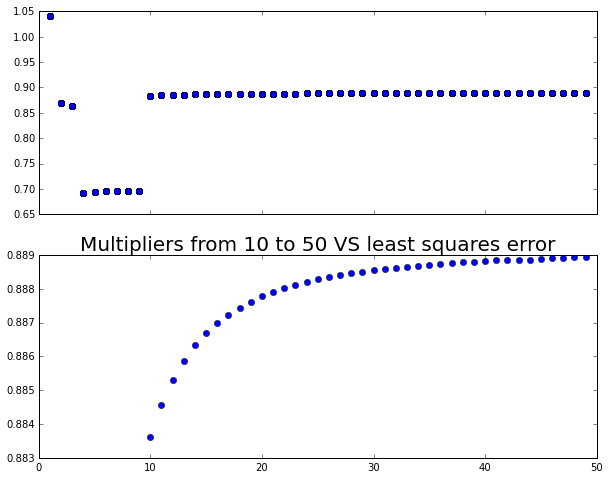

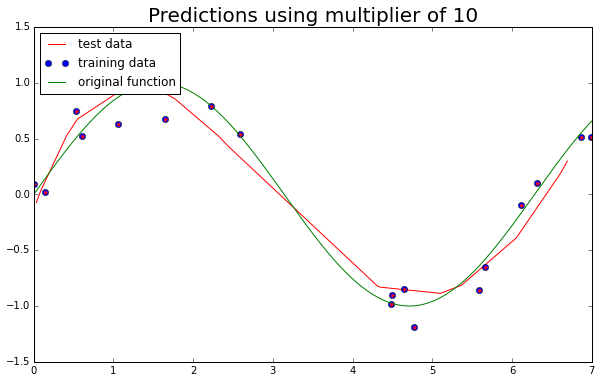

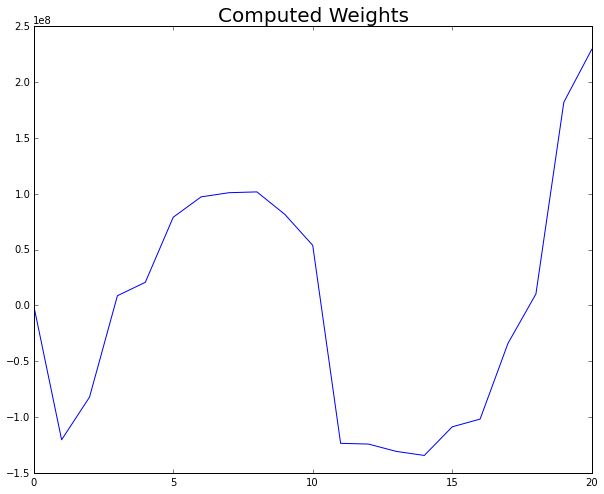

In [684]:
def e2(tte, y):
    return (sum((tte - y)**2))

# Try to find a better multiplier than 10
multiplier_range = range(1, 50)
error_matrix = np.zeros((2, len(multiplier_range)))

for i in range(1, 50):
    error_matrix[0][i-1] = e2(tte, rbf_2(xtr, ttr, xte, i, True)[0])
    error_matrix[1][i-1] = i

print "\n\nMultiplier with the least squares error:", error_matrix[1][argsort(error_matrix[0])[0]], "\n\n\n"

fig, ax = plt.subplots(2, 1, sharex=True)

print " "*15, "Multipliers from 1 to 50 VS least squares error:"
for i in range(1, 50):
    ax[0].plot(error_matrix[1], error_matrix[0], 'bo')

title("Multipliers from 10 to 50 VS least squares error", fontsize=20)
for i in range(10, 50):
    ax[1].plot(i, e2(tte, rbf_2(xtr, ttr, xte, i, True)[0]), 'bo')
    
figure()
rbf_2(xtr, ttr, xte, 10, False)
print

> ### Question:
Quantify how well it does by calculating the root mean squared error on the test data.  Is 10 times the average nearest neighbour distance a reasonable choice?

> ### Answer:
Having plotted multipliers between $1$ and $50$ vs their corresponding squared errors, it was observed that the multiplier of $10$ performs very well comparing to other multipliers and is a resonable choice. After running the code above with different samples several times I observed that multipliers smaller than $10$ usually have a very volatile performance and often produce errors that are significantly larger (as far as 80 in terms of least squares error) than least squares error produced by $10$. Occasionally, there are multipliers smaller than $10$ that produce least squares error that is smaller than that of $10$, but having tested this a thousand times (see the histogram below), the multiplier $10$ has on average the smallest error. Least squares errors of multipliers between 10 and 50 are all very small most of the time (varying between 0.8-3) and insignificantly different from each other. Despite this little error difference among multipliers in the range of 10-50, the multiplier 10 usually has the smallest error (see graph **"Multipliers from 10 to 50 VS least squares error"** or the frequency histogram below).

> Upon several runs multiplier 10 has shown <u><i>consistenly</i></u> good performance among other multipliers in terms of least squares error. As such, it seems to me as the most reasonable choice.

> It must be noted that these conclusions were made using the data set `xte` as the test data and `xtr` as training data, both of which were rather small in size. As such the conclusion could've been slightly different if larger data sets were used, though probably not too different.

(0, 50)

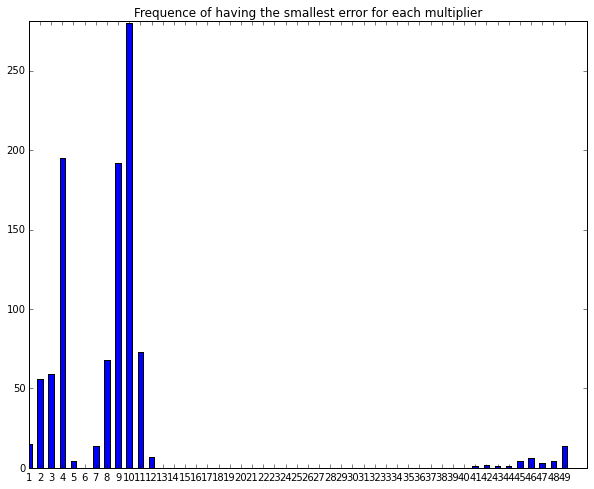

In [691]:
# Run the code 1000 times to find the best-performing multiplier for this dataset

# disable for now, since expensive
# counts = dict((el,0) for el in range(1, 50))
# for i in range(1, 1000):
#     xtr = rand(N)*3
#     xtr[:N//2] += 4           # add 4 to the first half of the data
#     xtr = sorted(xtr)         # Sorting helps visualise the design matrix later
#     ttr = sin(xtr) + randn(N)*0.2

#     xte = rand(N)*3
#     xte[:N//2] += 4
#     xte = sorted(xte)         # Sorting helps visualise the design matrix later
#     tte = sin(xte) + randn(N)*0.2
#     for i in range(1, 50):
#         error_matrix[0][i-1] = e2(tte, rbf_2(xtr, ttr, xte, i, True)[0])
#         error_matrix[1][i-1] = i
#     counts[error_matrix[1][argsort(error_matrix[0])[0]]] += 1

# cache this expensive computation:
counts = dict({1: 15, 2: 56, 3: 59, 4: 195, 5: 4, 6: 0, 7: 14, 8: 68, 9: 192, 10: 280, 11: 73, 12: 7, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 2, 43: 1, 44: 1, 45: 4, 46: 6, 47: 3, 48: 4, 49: 14})

title("Frequence of having the smallest error for each multiplier")
Xcounts = np.arange(len(counts))
bar(Xcounts, counts.values(), align='center', width=0.5)
xticks(Xcounts, counts.keys())
ymax = max(counts.values()) + 1
ylim(0, ymax)
xlim(0, 50)

### Overfitting and regularisation

Minimising the mean squared error on the training data can lead to **overfitting**, where the training data is fitted very well, but the test data is fitted poorly: the model does not **generalise** well.  This is because the model weights have been learned so that they fit not only the systematic trends in the data, but also the noise.  This is particularly a problem when there are lots of weights because in this case there is lots of flexibility in the model so that it is possible to fit the noise.

One way to counteract this in RBF regression is to adjust $\sigma$ so that it provides enough smoothing.   However, this limits the expressiveness of the model and a more general way of controlling the flexibility of the model is to prevent the weights from becoming too large.  You will have noticed that when the model is overfitting it tends to have large weights and it is intuitively clear that if the output of the model can only be large or change rapidly with $x$ if the weights are large. 

We can thus **regularise** the model by adding a penalty to the usual error function that makes the error large if the weights are large.  The penalised error function is
\begin{align}
    E(\mathbf{w}) = E_{data}(\mathbf{w}) + \alpha ||\mathbf{w}||^2
\end{align}
where $E_{data}(\mathbf{w}) = E_2(\mathbf{w}) $ is the mean squared error function that we have been using that measures the difference between the data and the output of the model, and $||\mathbf{w}||^2$ is the sum of the squares of the weights.  Thus the usual error function, the first term, is penalised by the second term: if (over)fitting the data would lead to large weights then that also means that the second term and thus the overall error is large.  Consequently minimising this error term arrives at a balance between fitting the data well and having small weights, effectively controlling the smoothness of the model.  The coefficient $\alpha$ controls how important the penalty is.  If $\alpha$ is small, the penalty is unimportant and the weights can be large; if $\alpha$ is large, the penalty means that the weights must be small and the output of the model smooth.  We will have to choose $\alpha$.

This is known as **weight decay regularisation** because it tends to make the weights small. Do some reading about weight decay regularisation; any of the recommended books will do.

A nice feature of WDR for regression is that $E(\mathbf{w})$ is still quadratic and so the optimum weights can be found by linear algebra.   The regularised weights are found as:
\begin{align}
   \newcommand{\bX}{\mathbf{X}}
\mathbf{w} = (\bX^T \bX + \alpha\mathbf{I})^{-1} \bX^T\mathbf{t}
\end{align}
where $\mathbf{X}$ is the design matrix as above and $\mathbf{t}$ is the vector of training targets.  Note that when $\alpha = 0$ we recover the expression for the pseudo-inverse.

### Weight decay regularisation

Copy and modify your RBF regression function to make a function     

    rbfwdr(xtr, ttr, xte, alpha)

that will use the training data <code>xtr</code> and <code>ttr</code> to make predictions for the features <code>xte</code> using a weight decay regularisation coefficent <code>alpha</code>.  As before your function should return the predictions for <code>xte</code> and the vector of coefficients <code>w</code>.

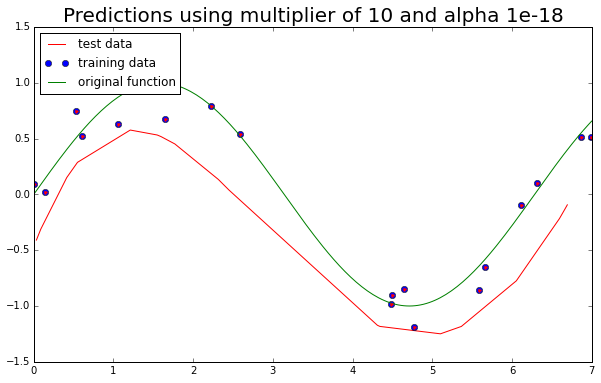

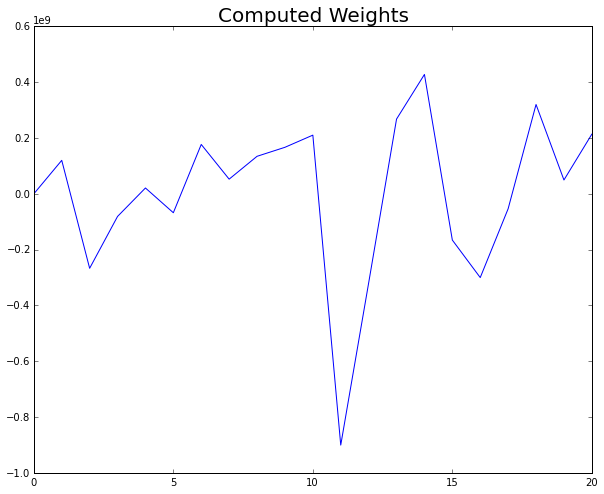

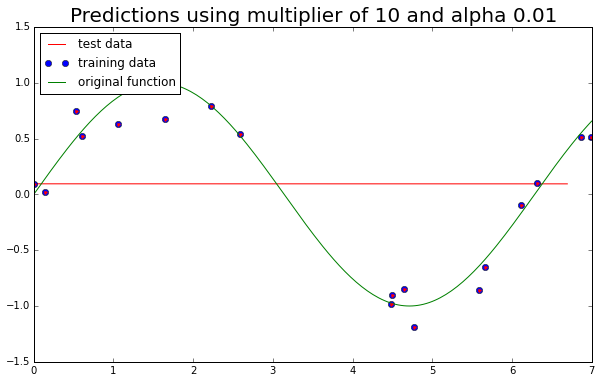

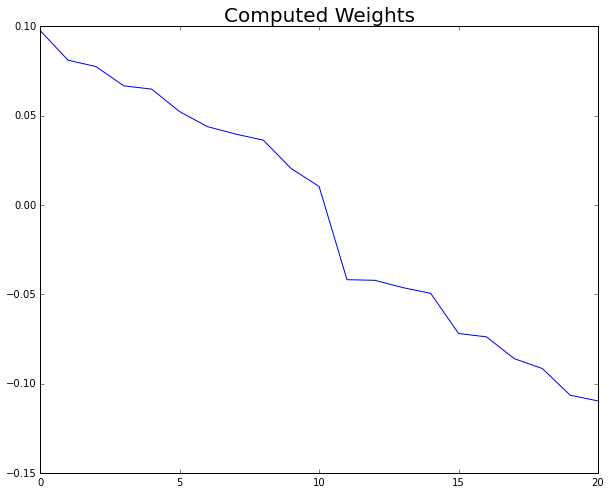

In [699]:
def rbfwdr(xtr, ttr, xte, alpha):
    # compute sigma
    # combine xtr & ttr into (x,y) pairs matrix
    data = np.hstack([np.matrix(xtr).T, np.matrix(ttr).T])
    # compute distances between neighbours
    distances = scipy.spatial.distance.cdist(data, data)
    # compute average distance between points
    sigma = 10*mean(distances)
    
    xx = linspace(0, 7, 200)

    N = len(xtr)
    Npred = len(xte)
    
    # TRAIN
    
    X = zeros((N,N+1))
    X[:,0] = 1    # Bias

    X = construc_design_matrix(xtr, xtr, N, sigma, range(0, N))
    # solve for the weights using the pseudo-inverse
    prod1 = dot(X.T, X)
    w =  dot(np.linalg.inv(prod1 + dot(alpha, np.identity(prod1.shape[0]))), dot(X.T, ttr))
    # PREDICT
    X = construc_design_matrix(xte, xtr, N, sigma, range(0, N))
    tte = dot(X, w)

    # Plot predictions
    figure(figsize=(10,6))
    title("Predictions using multiplier of %s and alpha %s" % (10, alpha), fontsize=20)
    plot(xte, tte, 'r-', label="test data")
    plot(xtr, ttr, 'bo', label="training data")
    plot(xx, sin(xx), 'g', label="original function")
    legend(loc=2)

    for i in range(0, N):
        plot(xtr[i], ttr[i], 'r.')

    figure()
    title("Computed Weights", fontsize=20)
    plot(w)

    return tte, w

rbfwdr(xtr, ttr, xte, 1e-18)
rbfwdr(xtr, ttr, xte, 1e-2)
print

> ### Question
Plot graphs of the predictions and weights with large and small $\alpha$ and verify that it does control the smoothness of the model output.

> ### Answer
As it is evident from the graphs above, the size of alpha indeed controls the smoothness of the graph. A very small alpha (1e-18) did not penalize weights much and allowed to achieve a decent data prediction. Contrary, a much larger alpha (0.01) significantly penalized large weights which in turn produced a very poor predictor that is just a straight line.

### Choosing $\alpha$

It remains to choose $\alpha$ which is done by cross validation.   The data set <code>nonlinreg-train.txt</code> and <code>nonlinreg-test.txt</code> contain features and targets for another one-dimensional, nonlinear regression problem.  Use your <code>rbfwdr</code> function to make predictions for these data and choose $\alpha$ by evaluating by cross validation.  You will need to evaluate the training and validation errors for $\alpha$ over a wide range, perhaps $10^{-5}$ to $10^1$; the function <code>logspace</code> is useful for producing equally spaced values: 

    alpha = logspace(1e-5, 1e1, 20)
    print alpha

    [  1.00002303e+00   3.35989158e+00   1.12886115e+01   3.79276373e+01
       1.27429815e+02   4.28140504e+02   1.43847255e+03   4.83300052e+03
       1.62379839e+04   5.45566090e+04   1.83300070e+05   6.15854182e+05
       2.06915563e+06   6.95197851e+06   2.33573562e+07   7.84763775e+07
       2.63666048e+08   8.85868938e+08   2.97635505e+09   1.00000000e+10]

Plot a graph of the training and validation errors versus $\alpha$ (<code>semilogx</code> is useful) and so choose the best $\alpha$ as the one that minimises the validataion error.

You probably won't need to use leave-one-out cross validation, 5-fold cross validation will probably be sufficient.  You can either write your own or you could use the functions in scikit-learn; see <http://scikit-learn.org/stable/modules/cross_validation.html>.  The following cell gives an example of how to generate training and test sets for 5-fold cross validation.

In [ ]:
from sklearn.cross_validation import KFold

# Make our training data of 10 examples, each of two columns.
# These have just got integers in so that you can easily see which 
# examples have been selected.
X = vstack((arange(10), arange(10))).T + 10
t = arange(10)+100   # Targets
print "Features"
print X
print "Targets"
print t
print 
print

cv = KFold(len(t), n_folds=5)

fold = 0
for train, test in cv:
    print '-------- Fold', fold
    print 'Train'
    print X[train]
    print t[train]
    print 'Test'
    print X[test]
    print t[test]
    fold += 1
    # Notice that each training set consists of 8 of the 10 examples 
    # and the test set is the remaining 2.
    # You should train the model with X[train] and t[train]
    # and test it on X[test] and t[test]


The following cell loads the data

In [ ]:
name = 'nonlinreg-train.txt'
try: 
    X = loadtxt(name)
except IOError:
    !wget --no-verbose http://empslocal.ex.ac.uk/~reverson/ECM3420/$name
    X = loadtxt(name)
print X.shape
xtr = X[:,0]
ttr = X[:,1]

name = 'nonlinreg-test.txt'
try: 
    X = loadtxt(name)
except IOError:
    !wget --no-verbose http://empslocal.ex.ac.uk/~reverson/ECM3420/$name
    X = loadtxt(name)
print X.shape
xte = X[:,0]
tte = X[:,1]

Evaluate your final, cross validated model on the actual test data.  There are many more examples of this so you should get an accurate result, but make sure you haven't used the test data during training.